In [3]:
from misc import draw_small_world
from multiprocessing import Pool
import numpy as np
from graph import Circle, Grid, RandomRegular, GraphByDegrees
from viz import draw_data
from utils import Timer, partition
from engine import fun
import jupyternotify
import random
ip = get_ipython()
ip.register_magics(jupyternotify.JupyterNotifyMagics)
import matplotlib.pyplot as plt
%matplotlib notebook

<IPython.core.display.Javascript object>

In [4]:
n = 1000 # number of vertices
m = 5 # avg deg 
T = 100
TAIL = 1000
I = 10

In [6]:
alpha = .10
bs = partition(1, 6, 256)

In [7]:
def calc(alphas, bs, graphs, T, pool_size=32):
    pool = Pool(pool_size)
    res = []
    timer = Timer()
    for graph in graphs:
        local_timer = Timer()
        res.append(pool.map(fun, [(graph, b, alpha, T) for b in bs for alpha in alphas]))
        print(f'passed in {local_timer.measure()}', flush=True)
    timer.print_elapsed()
    return np.array(res)

In [33]:
%%notify
mem = calc()

realization 0 passed in 926.7314248085022
realization 1 passed in 932.9712064266205
realization 2 passed in 924.1842703819275
realization 3 passed in 931.5030219554901
realization 4 passed in 955.6931722164154
realization 5 passed in 947.7446005344391
realization 6 passed in 926.9563989639282
realization 7 passed in 944.3387773036957
realization 8 passed in 950.8194324970245
realization 9 passed in 941.7719528675079
time elapsed = 9382.728734493256


<IPython.core.display.Javascript object>

Process ForkPoolWorker-79:
Process ForkPoolWorker-86:
Process ForkPoolWorker-74:
Process ForkPoolWorker-84:
Process ForkPoolWorker-77:
Process ForkPoolWorker-72:
Process ForkPoolWorker-65:
Process ForkPoolWorker-66:
Process ForkPoolWorker-76:
Process ForkPoolWorker-73:
Traceback (most recent call last):
Process ForkPoolWorker-92:
Process ForkPoolWorker-69:
Process ForkPoolWorker-88:
Process ForkPoolWorker-90:
Process ForkPoolWorker-85:
Traceback (most recent call last):
Process ForkPoolWorker-94:
Process ForkPoolWorker-70:
Process ForkPoolWorker-67:
Process ForkPoolWorker-81:
Process ForkPoolWorker-91:
Traceback (most recent call last):
Process ForkPoolWorker-78:
Process ForkPoolWorker-75:
Process ForkPoolWorker-71:
Process ForkPoolWorker-93:
Traceback (most recent call last):
Process ForkPoolWorker-87:
Traceback (most recent call last):
Process ForkPoolWorker-68:
Process ForkPoolWorker-95:
Process ForkPoolWorker-89:
Process ForkPoolWorker-80:
Process ForkPoolWorker-82:
Process ForkPoo

  File "/usr/lib/python3.7/multiprocessing/pool.py", line 110, in worker
    task = get()
  File "/usr/lib/python3.7/multiprocessing/pool.py", line 110, in worker
    task = get()
  File "/usr/lib/python3.7/multiprocessing/queues.py", line 351, in get
    with self._rlock:
  File "/usr/lib/python3.7/multiprocessing/pool.py", line 110, in worker
    task = get()
  File "/usr/lib/python3.7/multiprocessing/pool.py", line 110, in worker
    task = get()
  File "/usr/lib/python3.7/multiprocessing/pool.py", line 110, in worker
    task = get()
  File "/usr/lib/python3.7/multiprocessing/pool.py", line 110, in worker
    task = get()
  File "/usr/lib/python3.7/multiprocessing/queues.py", line 351, in get
    with self._rlock:
  File "/usr/lib/python3.7/multiprocessing/pool.py", line 110, in worker
    task = get()
  File "/usr/lib/python3.7/multiprocessing/queues.py", line 351, in get
    with self._rlock:
  File "/usr/lib/python3.7/multiprocessing/pool.py", line 110, in worker
    task = get(

  File "/usr/lib/python3.7/multiprocessing/process.py", line 297, in _bootstrap
    self.run()
  File "/usr/lib/python3.7/multiprocessing/process.py", line 297, in _bootstrap
    self.run()
  File "/usr/lib/python3.7/multiprocessing/process.py", line 99, in run
    self._target(*self._args, **self._kwargs)
  File "/usr/lib/python3.7/multiprocessing/process.py", line 99, in run
    self._target(*self._args, **self._kwargs)
  File "/usr/lib/python3.7/multiprocessing/process.py", line 99, in run
    self._target(*self._args, **self._kwargs)
  File "/usr/lib/python3.7/multiprocessing/process.py", line 99, in run
    self._target(*self._args, **self._kwargs)
  File "/usr/lib/python3.7/multiprocessing/pool.py", line 110, in worker
    task = get()
  File "/usr/lib/python3.7/multiprocessing/pool.py", line 110, in worker
    task = get()
  File "/usr/lib/python3.7/multiprocessing/pool.py", line 110, in worker
    task = get()
  File "/usr/lib/python3.7/multiprocessing/pool.py", line 110, in wo

In [26]:
mem2 = np.array(mem)

In [40]:
mem.shape

(10, 256, 10000)

In [8]:
def plot_mean_and_std(bs, data, last):
    fig, axs = plt.subplots(2)
    
    cur = np.apply_along_axis(lambda x: np.mean(x[-last:]), 2, data)
    cur = np.apply_along_axis(np.mean, 0, cur)
    axs[0].plot(bs, cur, '.-')
    
    cur = np.apply_along_axis(lambda x: np.std(x[-last:]), 2, data)
    cur = np.apply_along_axis(np.mean, 0, cur)
    axs[1].plot(bs, cur, '.-')

In [9]:
def plot_avg_deg_distribuion(graphs, max_deg=20):
    s = [0] * max_deg
    for graph in graphs:
        for d, cnt in graph.degrees().items():
            if d < max_deg:
                s[d] += cnt
    s = np.array(s)
    s = s / sum(s)
    #for i in range(1, len(s)):
    #    s[i] += s[i - 1]
    plt.scatter(np.arange(len(s)), s, c='red')

<IPython.core.display.Javascript object>


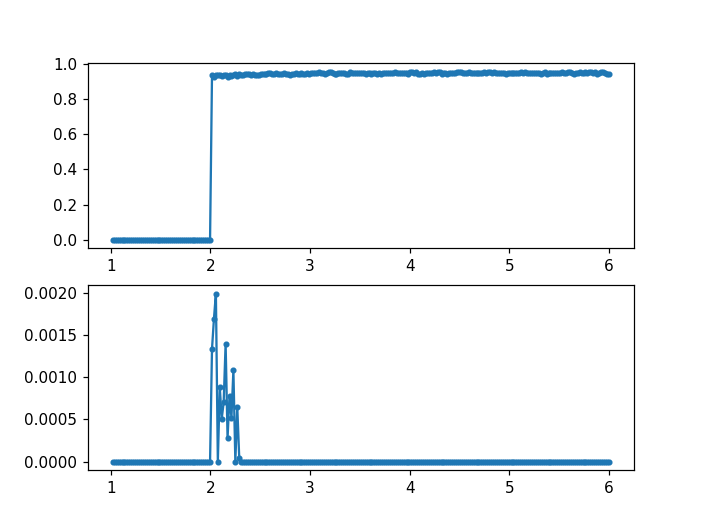

In [56]:
plot_mean_and_std(mem, TAIL)

In [49]:
grids = [Grid(30, 30) for _ in range(I)]

In [58]:
grid_res = calc([alpha], bs, grids, 100)

passed in 25.49805498123169
passed in 24.151987314224243
passed in 24.18917155265808
passed in 24.47984552383423
passed in 25.546541213989258
passed in 24.930585861206055
passed in 24.48188018798828
passed in 24.601742029190063
passed in 24.420748710632324
passed in 24.230205535888672
time elapsed = 246.5663561820984


<IPython.core.display.Javascript object>


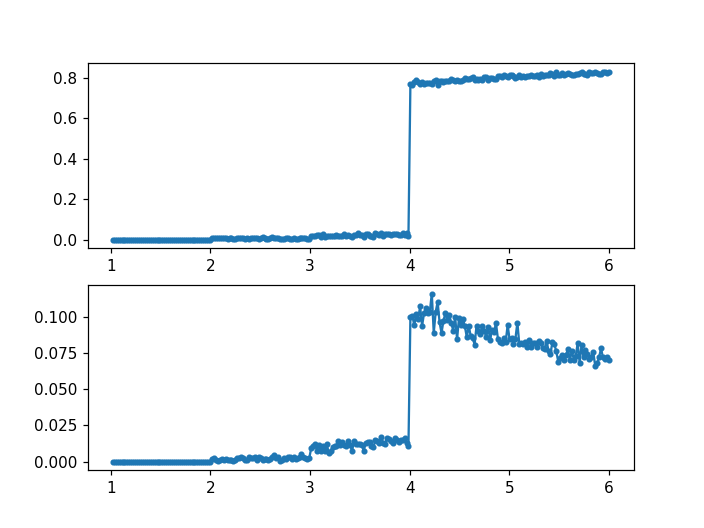

In [62]:
plot_mean_and_std(grid_res, 90)

In [31]:
regs3 = [RandomRegular(500, 3) for _ in range(I)]

In [32]:
reg3_res = calc([alpha], bs, regs3, 1000)

passed in 51.902180671691895
passed in 51.90944027900696
passed in 51.981390953063965
passed in 53.21961188316345
passed in 54.313772439956665
passed in 52.915574073791504
passed in 52.94361591339111
passed in 52.395309925079346
passed in 52.21228742599487
passed in 52.699249505996704
time elapsed = 526.5078201293945


<IPython.core.display.Javascript object>


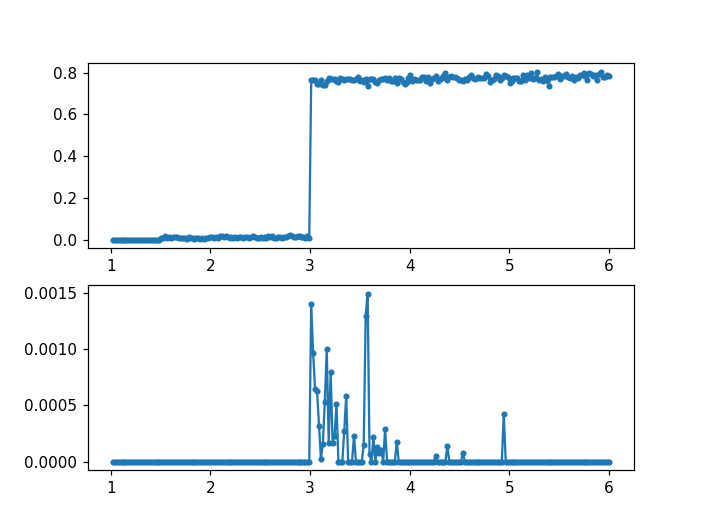

In [33]:
plot_mean_and_std(reg3_res, 50)

In [24]:
regs5 = [RandomRegular(500, 5) for _ in range(I)]

In [25]:
reg5_res = calc([alpha], bs, regs5, 2000)

passed in 138.93698978424072
passed in 138.29775071144104
passed in 141.81029558181763
passed in 138.2881429195404
passed in 142.22185564041138
passed in 138.7704803943634
passed in 141.66771960258484
passed in 144.0710768699646
passed in 141.1458592414856
passed in 145.84449815750122
time elapsed = 1411.0671000480652


<IPython.core.display.Javascript object>


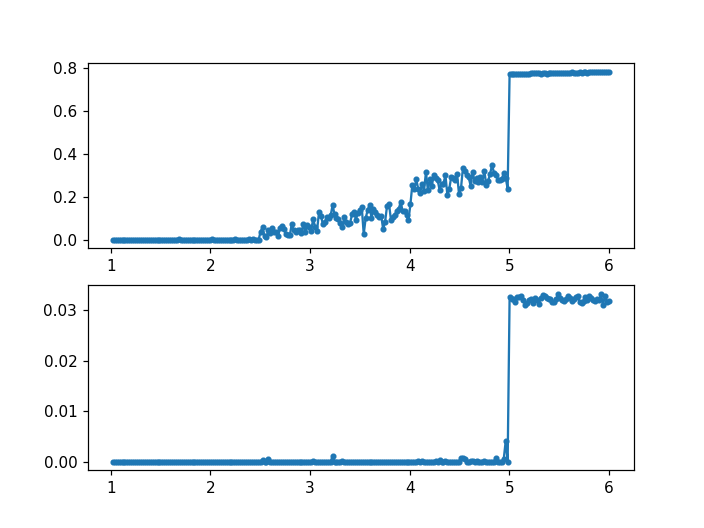

In [30]:
plot_mean_and_std(reg5_res, 1000)

In [7]:
graphs = [GraphByDegrees({3 : 100, 5 : 100, 7 : 100}) for _ in range(I)]

<IPython.core.display.Javascript object>


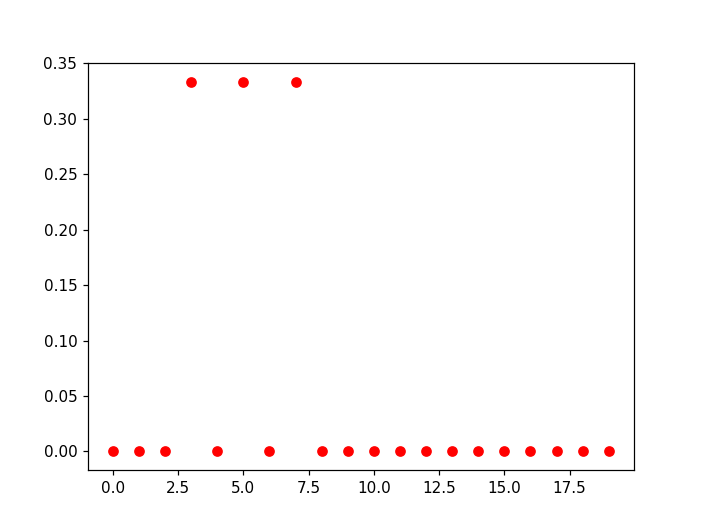

In [12]:
plot_avg_deg_distribuion(graphs)

In [23]:
res357 = calc([alpha], partition(0, 10, 256), graphs, 10000)

passed in 397.0555603504181
passed in 399.58615732192993
passed in 406.49014925956726
passed in 396.780070066452
passed in 405.34024477005005
passed in 409.1000270843506
passed in 414.20205640792847
passed in 407.93881034851074
passed in 398.51636958122253
passed in 405.49170303344727
time elapsed = 4040.516279220581


<IPython.core.display.Javascript object>


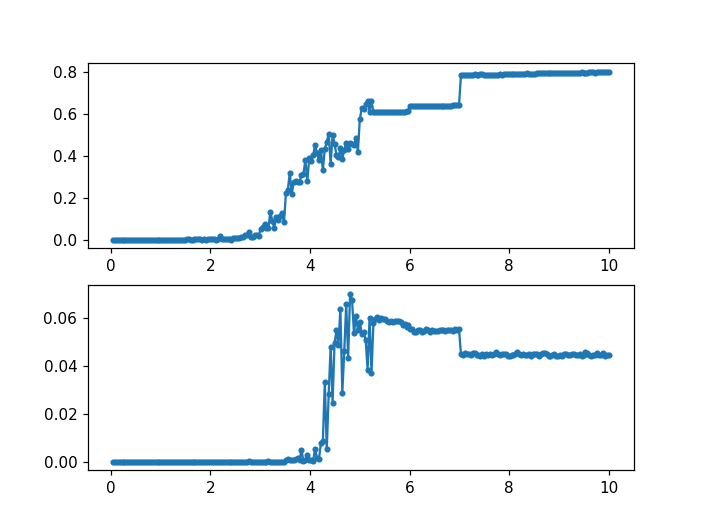

In [28]:
plot_mean_and_std(partition(0, 10, 256), res357, 5000)

<IPython.core.display.Javascript object>


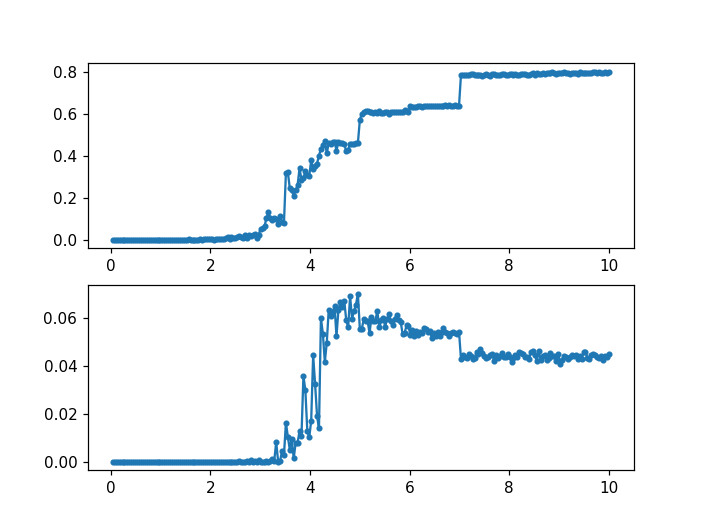

In [22]:
plot_mean_and_std(partition(0, 10, 256), res357, 500)

In [11]:
pool = Pool(32)
timer = Timer()
graphs357_100 = pool.map(GraphByDegrees, [{3: 200, 5: 200, 7: 200} for _ in range(100)])
timer.print_elapsed()

time elapsed = 229.5550389289856


In [12]:
res357 = calc([alpha], partition(0, 10, 256), graphs357_100, 1000)

passed in 84.69341373443604
passed in 87.22150349617004
passed in 85.42549419403076
passed in 85.40339374542236
passed in 85.9194610118866
passed in 87.06641030311584
passed in 88.00383281707764
passed in 87.70123314857483
passed in 88.96097326278687
passed in 91.5428569316864
passed in 89.42088389396667
passed in 88.26507830619812
passed in 89.1284019947052
passed in 91.95608973503113
passed in 90.86528825759888
passed in 90.38099479675293
passed in 91.79599666595459
passed in 83.86304759979248
passed in 86.38420939445496
passed in 87.52560710906982
passed in 87.2063057422638
passed in 87.21684074401855
passed in 86.29800367355347
passed in 86.04983949661255
passed in 86.56431937217712
passed in 85.69950699806213
passed in 87.04961633682251
passed in 86.75944662094116
passed in 85.47239089012146
passed in 87.20461988449097
passed in 87.73235774040222
passed in 86.3518795967102
passed in 87.7700572013855
passed in 89.13406109809875
passed in 88.84013366699219
passed in 86.3923029899597

<IPython.core.display.Javascript object>


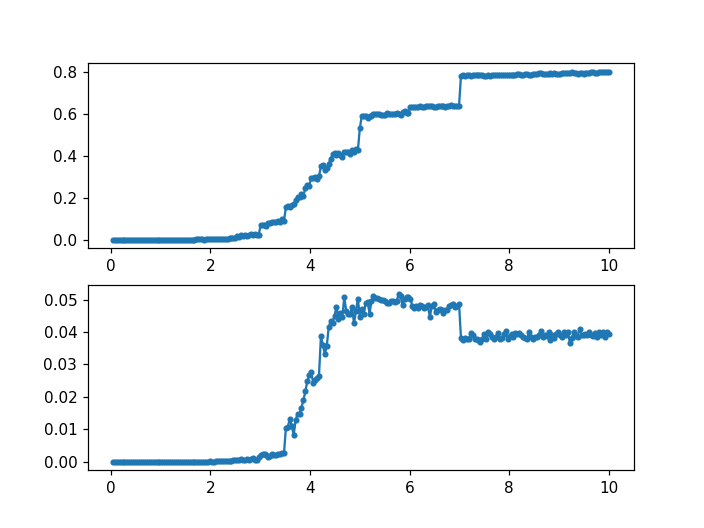

In [10]:
plot_mean_and_std(partition(0, 10, 256), res357, 500)

<IPython.core.display.Javascript object>


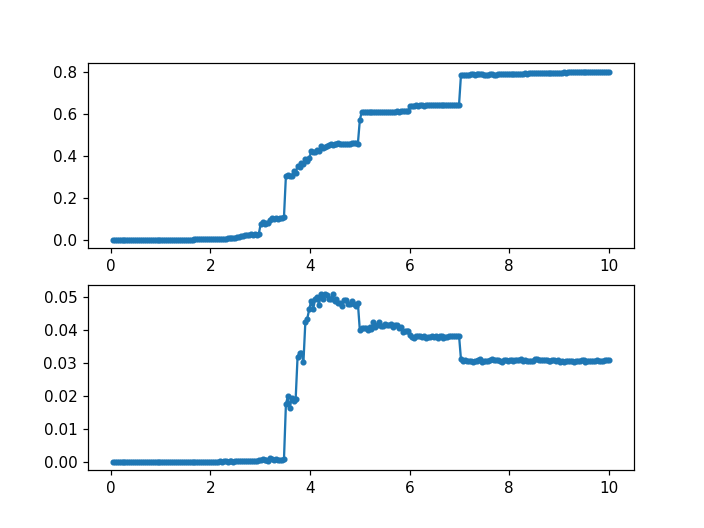

In [13]:
plot_mean_and_std(partition(0, 10, 256), res357, 500)

In [10]:
pool = Pool(32)
graphs23 = pool.map(GraphByDegrees, [{2: 500, 3: 500} for _ in range(100)])

Process ForkPoolWorker-2:
Process ForkPoolWorker-15:
Process ForkPoolWorker-1:
Process ForkPoolWorker-11:
Process ForkPoolWorker-10:
Process ForkPoolWorker-29:
Process ForkPoolWorker-14:
Traceback (most recent call last):
Process ForkPoolWorker-20:
Traceback (most recent call last):
Process ForkPoolWorker-18:
Process ForkPoolWorker-19:
Process ForkPoolWorker-21:
Process ForkPoolWorker-32:
Process ForkPoolWorker-5:
Process ForkPoolWorker-13:
Traceback (most recent call last):
Process ForkPoolWorker-25:
Process ForkPoolWorker-22:
Traceback (most recent call last):
Process ForkPoolWorker-8:
Process ForkPoolWorker-3:
Process ForkPoolWorker-24:
Process ForkPoolWorker-16:
Process ForkPoolWorker-7:
Process ForkPoolWorker-30:
Traceback (most recent call last):
Process ForkPoolWorker-31:
Process ForkPoolWorker-23:
Traceback (most recent call last):
Traceback (most recent call last):
  File "/usr/lib/python3.7/multiprocessing/process.py", line 297, in _bootstrap
    self.run()
  File "/usr/lib/p

  File "/usr/lib/python3.7/multiprocessing/process.py", line 99, in run
    self._target(*self._args, **self._kwargs)
  File "/usr/lib/python3.7/multiprocessing/process.py", line 99, in run
    self._target(*self._args, **self._kwargs)
  File "/usr/lib/python3.7/multiprocessing/queues.py", line 351, in get
    with self._rlock:
  File "/usr/lib/python3.7/multiprocessing/pool.py", line 110, in worker
    task = get()
  File "/usr/lib/python3.7/multiprocessing/pool.py", line 110, in worker
    task = get()
  File "/usr/lib/python3.7/multiprocessing/pool.py", line 110, in worker
    task = get()
  File "/usr/lib/python3.7/multiprocessing/pool.py", line 110, in worker
    task = get()
  File "/usr/lib/python3.7/multiprocessing/process.py", line 99, in run
    self._target(*self._args, **self._kwargs)
  File "/usr/lib/python3.7/multiprocessing/queues.py", line 351, in get
    with self._rlock:
  File "/usr/lib/python3.7/multiprocessing/process.py", line 99, in run
    self._target(*self._ar

  File "/usr/lib/python3.7/multiprocessing/synchronize.py", line 95, in __enter__
    return self._semlock.__enter__()
  File "/usr/lib/python3.7/multiprocessing/synchronize.py", line 95, in __enter__
    return self._semlock.__enter__()
KeyboardInterrupt
KeyboardInterrupt
  File "/usr/lib/python3.7/multiprocessing/connection.py", line 216, in recv_bytes
    buf = self._recv_bytes(maxlength)
KeyboardInterrupt
KeyboardInterrupt
KeyboardInterrupt
KeyboardInterrupt
KeyboardInterrupt
KeyboardInterrupt
KeyboardInterrupt
KeyboardInterrupt
KeyboardInterrupt
KeyboardInterrupt
KeyboardInterrupt
KeyboardInterrupt
KeyboardInterrupt
KeyboardInterrupt
  File "/usr/lib/python3.7/multiprocessing/connection.py", line 407, in _recv_bytes
    buf = self._recv(4)
  File "/usr/lib/python3.7/multiprocessing/connection.py", line 379, in _recv
    chunk = read(handle, remaining)
KeyboardInterrupt
  File "/usr/lib/python3.7/multiprocessing/process.py", line 297, in _bootstrap
    self.run()
Traceback (most re

In [32]:
res23 = calc([alpha], partition(0, 8, 32), graphs23, 1000)

passed in 12.645363569259644
passed in 12.199776887893677
passed in 12.23802638053894
passed in 12.26967740058899
passed in 12.131190299987793
passed in 12.206055402755737
passed in 13.065869569778442
passed in 12.568719625473022
passed in 12.56330943107605
passed in 12.596055030822754
passed in 12.810281991958618
passed in 12.890954971313477
passed in 12.828192710876465
passed in 12.701529502868652
passed in 12.81175708770752
passed in 12.76143193244934
passed in 12.62601089477539
passed in 12.602590084075928
passed in 12.579639673233032
passed in 12.543687343597412
passed in 12.915796756744385
passed in 12.669408321380615
passed in 12.68073582649231
passed in 12.864088296890259
passed in 13.154649019241333
passed in 12.897796154022217
passed in 12.62043023109436
passed in 12.655577421188354
passed in 12.65320634841919
passed in 12.900958061218262
passed in 12.858599662780762
passed in 12.884873867034912
passed in 12.840169668197632
passed in 12.751131772994995
passed in 12.7431817054

Process ForkPoolWorker-94:
Process ForkPoolWorker-77:
Process ForkPoolWorker-95:
Process ForkPoolWorker-88:
Process ForkPoolWorker-93:
Process ForkPoolWorker-82:
Process ForkPoolWorker-69:
Process ForkPoolWorker-83:
Process ForkPoolWorker-73:
Traceback (most recent call last):
Process ForkPoolWorker-68:
Traceback (most recent call last):
Process ForkPoolWorker-89:
Process ForkPoolWorker-87:
Process ForkPoolWorker-96:
Process ForkPoolWorker-84:
Process ForkPoolWorker-65:
Traceback (most recent call last):
Process ForkPoolWorker-81:
Process ForkPoolWorker-78:
Process ForkPoolWorker-66:
Process ForkPoolWorker-86:
Process ForkPoolWorker-92:
Process ForkPoolWorker-72:
Process ForkPoolWorker-71:
Process ForkPoolWorker-74:
Process ForkPoolWorker-67:
Process ForkPoolWorker-76:
Process ForkPoolWorker-80:
Process ForkPoolWorker-90:
Process ForkPoolWorker-70:
Process ForkPoolWorker-75:
Process ForkPoolWorker-85:
Process ForkPoolWorker-79:
Process ForkPoolWorker-91:
  File "/usr/lib/python3.7/mult

  File "/usr/lib/python3.7/multiprocessing/pool.py", line 110, in worker
    task = get()
  File "/usr/lib/python3.7/multiprocessing/process.py", line 99, in run
    self._target(*self._args, **self._kwargs)
  File "/usr/lib/python3.7/multiprocessing/pool.py", line 110, in worker
    task = get()
  File "/usr/lib/python3.7/multiprocessing/pool.py", line 110, in worker
    task = get()
  File "/usr/lib/python3.7/multiprocessing/pool.py", line 110, in worker
    task = get()
  File "/usr/lib/python3.7/multiprocessing/pool.py", line 110, in worker
    task = get()
  File "/usr/lib/python3.7/multiprocessing/pool.py", line 110, in worker
    task = get()
  File "/usr/lib/python3.7/multiprocessing/pool.py", line 110, in worker
    task = get()
  File "/usr/lib/python3.7/multiprocessing/pool.py", line 110, in worker
    task = get()
  File "/usr/lib/python3.7/multiprocessing/pool.py", line 110, in worker
    task = get()
  File "/usr/lib/python3.7/multiprocessing/pool.py", line 110, in worker

KeyboardInterrupt
KeyboardInterrupt
KeyboardInterrupt
KeyboardInterrupt
  File "/usr/lib/python3.7/multiprocessing/synchronize.py", line 95, in __enter__
    return self._semlock.__enter__()
KeyboardInterrupt
KeyboardInterrupt
KeyboardInterrupt
KeyboardInterrupt
KeyboardInterrupt
KeyboardInterrupt
KeyboardInterrupt
KeyboardInterrupt
KeyboardInterrupt
KeyboardInterrupt
KeyboardInterrupt
KeyboardInterrupt
KeyboardInterrupt
KeyboardInterrupt
  File "/usr/lib/python3.7/multiprocessing/connection.py", line 379, in _recv
    chunk = read(handle, remaining)
KeyboardInterrupt
KeyboardInterrupt
Traceback (most recent call last):
Traceback (most recent call last):
  File "/usr/lib/python3.7/multiprocessing/process.py", line 297, in _bootstrap
    self.run()
  File "/usr/lib/python3.7/multiprocessing/process.py", line 297, in _bootstrap
    self.run()
  File "/usr/lib/python3.7/multiprocessing/process.py", line 99, in run
    self._target(*self._args, **self._kwargs)
  File "/usr/lib/python3.7/mu

In [11]:
res23 = calc([alpha], partition(0, 8, 32), graphs23, 1000)

passed in 10.60906982421875
passed in 14.573470115661621
passed in 10.270485401153564
passed in 10.399563789367676
passed in 14.627430200576782
passed in 14.537954807281494
passed in 16.418378829956055
passed in 10.283383131027222
passed in 10.184252738952637
passed in 10.194565534591675
passed in 14.66512656211853
passed in 14.592982053756714
passed in 14.755789518356323
passed in 10.105084419250488
passed in 16.201927661895752
passed in 10.259844064712524
passed in 10.39806604385376
passed in 14.490371227264404
passed in 10.127965450286865
passed in 16.542421102523804
passed in 10.378471374511719
passed in 10.220697402954102
passed in 16.31172251701355
passed in 14.483412265777588
passed in 10.24654221534729
passed in 12.458434343338013
passed in 10.195160388946533
passed in 10.193364143371582
passed in 16.69236660003662
passed in 14.567663431167603
passed in 14.456339836120605
passed in 10.290509939193726
passed in 12.54649019241333
passed in 16.401336431503296
passed in 16.52447915

Process ForkPoolWorker-56:
Process ForkPoolWorker-64:
Process ForkPoolWorker-38:
Process ForkPoolWorker-39:
Process ForkPoolWorker-59:
Process ForkPoolWorker-36:
Process ForkPoolWorker-41:
Process ForkPoolWorker-63:
Process ForkPoolWorker-58:
Process ForkPoolWorker-50:
Process ForkPoolWorker-44:
Process ForkPoolWorker-34:
Process ForkPoolWorker-47:
Process ForkPoolWorker-37:
Process ForkPoolWorker-48:
Process ForkPoolWorker-52:
Process ForkPoolWorker-46:
Process ForkPoolWorker-45:
Process ForkPoolWorker-49:
Process ForkPoolWorker-51:
Process ForkPoolWorker-33:
Process ForkPoolWorker-43:
Traceback (most recent call last):
Traceback (most recent call last):
Process ForkPoolWorker-55:
Process ForkPoolWorker-60:
Process ForkPoolWorker-42:
Process ForkPoolWorker-54:
Process ForkPoolWorker-40:
Process ForkPoolWorker-61:
Process ForkPoolWorker-53:
Process ForkPoolWorker-62:
Traceback (most recent call last):
Traceback (most recent call last):
Process ForkPoolWorker-35:
Traceback (most recent 

  File "/usr/lib/python3.7/multiprocessing/pool.py", line 110, in worker
    task = get()
  File "/usr/lib/python3.7/multiprocessing/pool.py", line 110, in worker
    task = get()
  File "/usr/lib/python3.7/multiprocessing/pool.py", line 110, in worker
    task = get()
  File "/usr/lib/python3.7/multiprocessing/pool.py", line 110, in worker
    task = get()
  File "/usr/lib/python3.7/multiprocessing/process.py", line 99, in run
    self._target(*self._args, **self._kwargs)
  File "/usr/lib/python3.7/multiprocessing/pool.py", line 110, in worker
    task = get()
  File "/usr/lib/python3.7/multiprocessing/pool.py", line 110, in worker
    task = get()
  File "/usr/lib/python3.7/multiprocessing/pool.py", line 110, in worker
    task = get()
  File "/usr/lib/python3.7/multiprocessing/pool.py", line 110, in worker
    task = get()
  File "/usr/lib/python3.7/multiprocessing/process.py", line 99, in run
    self._target(*self._args, **self._kwargs)
  File "/usr/lib/python3.7/multiprocessing/p

  File "/usr/lib/python3.7/multiprocessing/synchronize.py", line 95, in __enter__
    return self._semlock.__enter__()
KeyboardInterrupt
KeyboardInterrupt
  File "/usr/lib/python3.7/multiprocessing/synchronize.py", line 95, in __enter__
    return self._semlock.__enter__()
KeyboardInterrupt
KeyboardInterrupt
KeyboardInterrupt
KeyboardInterrupt
  File "/usr/lib/python3.7/multiprocessing/synchronize.py", line 95, in __enter__
    return self._semlock.__enter__()
KeyboardInterrupt
KeyboardInterrupt
KeyboardInterrupt
KeyboardInterrupt
KeyboardInterrupt
  File "/usr/lib/python3.7/multiprocessing/synchronize.py", line 95, in __enter__
    return self._semlock.__enter__()
KeyboardInterrupt
KeyboardInterrupt
KeyboardInterrupt
KeyboardInterrupt
KeyboardInterrupt
KeyboardInterrupt
KeyboardInterrupt
KeyboardInterrupt
KeyboardInterrupt
KeyboardInterrupt
KeyboardInterrupt
  File "/usr/lib/python3.7/multiprocessing/connection.py", line 407, in _recv_bytes
    buf = self._recv(4)
KeyboardInterrupt
Ke

<IPython.core.display.Javascript object>


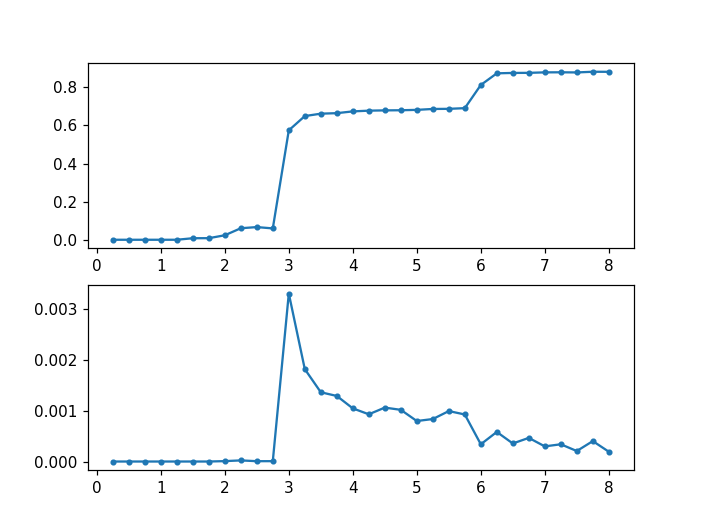

In [35]:
plot_mean_and_std(partition(0, 8, 32), res23, 100)

<IPython.core.display.Javascript object>


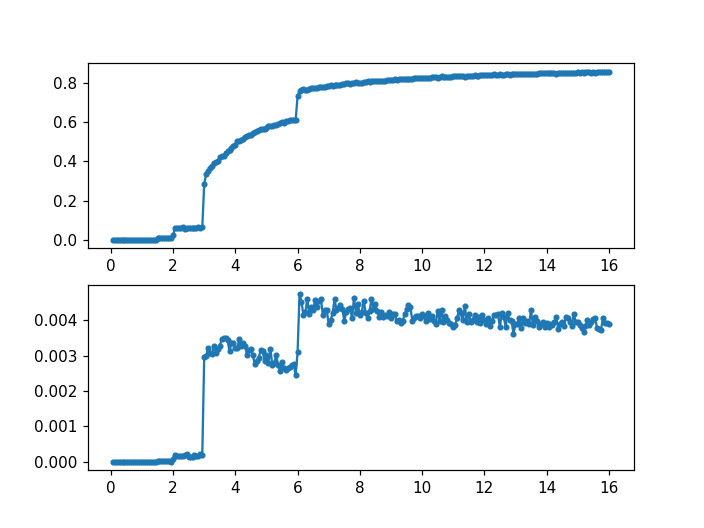

In [13]:
plot_mean_and_std(partition(0, 16, 256), res23, 5)

In [30]:
def plot_means(bs, data, last):
    fig, ax = plt.subplots()
    
    cur = np.apply_along_axis(lambda x: np.mean(x[-last:]), 2, data)
    for t in cur:
        ax.scatter(bs, t, s=1, alpha=.05, c='red')
        
    cur = np.apply_along_axis(np.mean, 0, cur)
    ax.plot(bs, cur, '-')
    plt.show()

<IPython.core.display.Javascript object>


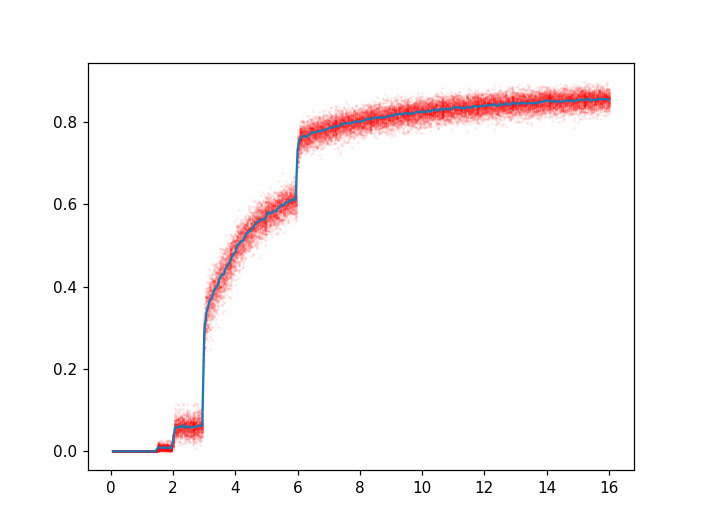

In [31]:
plot_means(partition(0, 16, 256), res23, 5)

<IPython.core.display.Javascript object>


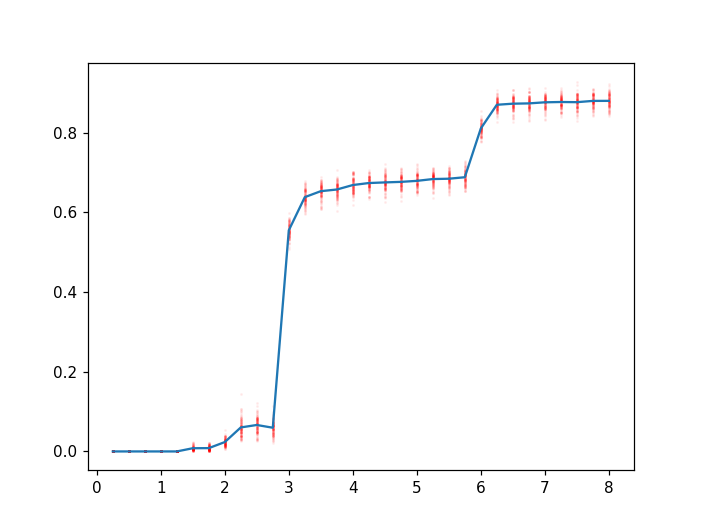

In [36]:
plot_means(partition(0, 8, 32), res23, 500)

In [37]:
res23 = calc([alpha], partition(0, 8, 128), graphs23, 10000)

passed in 484.6190552711487
passed in 494.1133782863617
passed in 486.80627369880676
passed in 487.8047523498535
passed in 481.70342111587524
passed in 496.802490234375
passed in 495.94948554039
passed in 488.3192529678345
passed in 487.4876973628998
passed in 496.35375905036926
passed in 493.12963581085205
passed in 490.2380418777466
passed in 500.54828667640686
passed in 494.7316300868988
passed in 495.0264835357666
passed in 487.08429288864136
passed in 493.10781025886536
passed in 482.78174805641174
passed in 489.74482345581055
passed in 486.04289078712463
passed in 492.35876727104187
passed in 493.62768030166626
passed in 497.60599303245544
passed in 492.1985213756561
passed in 489.4163248538971
passed in 492.391273021698
passed in 487.29731917381287
passed in 500.74708819389343
passed in 501.08566308021545
passed in 524.2069458961487
passed in 526.7151937484741
passed in 525.0534107685089
passed in 528.9977662563324
passed in 528.7025201320648
passed in 520.7721621990204
passed i

Process ForkPoolWorker-124:
Process ForkPoolWorker-111:
Process ForkPoolWorker-106:
Process ForkPoolWorker-126:
Process ForkPoolWorker-103:
Process ForkPoolWorker-102:
Process ForkPoolWorker-113:
Process ForkPoolWorker-100:
Process ForkPoolWorker-97:
Process ForkPoolWorker-116:
Process ForkPoolWorker-127:
Process ForkPoolWorker-112:
Process ForkPoolWorker-108:
Process ForkPoolWorker-98:
Process ForkPoolWorker-114:
Process ForkPoolWorker-117:
Process ForkPoolWorker-110:
Process ForkPoolWorker-119:
Process ForkPoolWorker-109:
Traceback (most recent call last):
Process ForkPoolWorker-121:
Process ForkPoolWorker-99:
Process ForkPoolWorker-118:
Process ForkPoolWorker-101:
Process ForkPoolWorker-125:
Process ForkPoolWorker-128:
Process ForkPoolWorker-115:
Process ForkPoolWorker-122:
Traceback (most recent call last):
Traceback (most recent call last):
Traceback (most recent call last):
Traceback (most recent call last):
Process ForkPoolWorker-107:
Traceback (most recent call last):
  File "/

  File "/usr/lib/python3.7/multiprocessing/process.py", line 99, in run
    self._target(*self._args, **self._kwargs)
  File "/usr/lib/python3.7/multiprocessing/pool.py", line 110, in worker
    task = get()
  File "/usr/lib/python3.7/multiprocessing/pool.py", line 110, in worker
    task = get()
  File "/usr/lib/python3.7/multiprocessing/process.py", line 99, in run
    self._target(*self._args, **self._kwargs)
  File "/usr/lib/python3.7/multiprocessing/pool.py", line 110, in worker
    task = get()
  File "/usr/lib/python3.7/multiprocessing/queues.py", line 351, in get
    with self._rlock:
  File "/usr/lib/python3.7/multiprocessing/pool.py", line 110, in worker
    task = get()
  File "/usr/lib/python3.7/multiprocessing/pool.py", line 110, in worker
    task = get()
  File "/usr/lib/python3.7/multiprocessing/pool.py", line 110, in worker
    task = get()
  File "/usr/lib/python3.7/multiprocessing/pool.py", line 110, in worker
    task = get()
  File "/usr/lib/python3.7/multiprocessi

  File "/usr/lib/python3.7/multiprocessing/process.py", line 297, in _bootstrap
    self.run()
  File "/usr/lib/python3.7/multiprocessing/process.py", line 99, in run
    self._target(*self._args, **self._kwargs)
  File "/usr/lib/python3.7/multiprocessing/pool.py", line 110, in worker
    task = get()
  File "/usr/lib/python3.7/multiprocessing/queues.py", line 351, in get
    with self._rlock:
  File "/usr/lib/python3.7/multiprocessing/pool.py", line 110, in worker
    task = get()
  File "/usr/lib/python3.7/multiprocessing/process.py", line 99, in run
    self._target(*self._args, **self._kwargs)
  File "/usr/lib/python3.7/multiprocessing/pool.py", line 110, in worker
    task = get()
  File "/usr/lib/python3.7/multiprocessing/queues.py", line 351, in get
    with self._rlock:
  File "/usr/lib/python3.7/multiprocessing/synchronize.py", line 95, in __enter__
    return self._semlock.__enter__()
  File "/usr/lib/python3.7/multiprocessing/queues.py", line 351, in get
    with self._rlock

In [38]:
res23.shape

(100, 128, 10000)

<IPython.core.display.Javascript object>


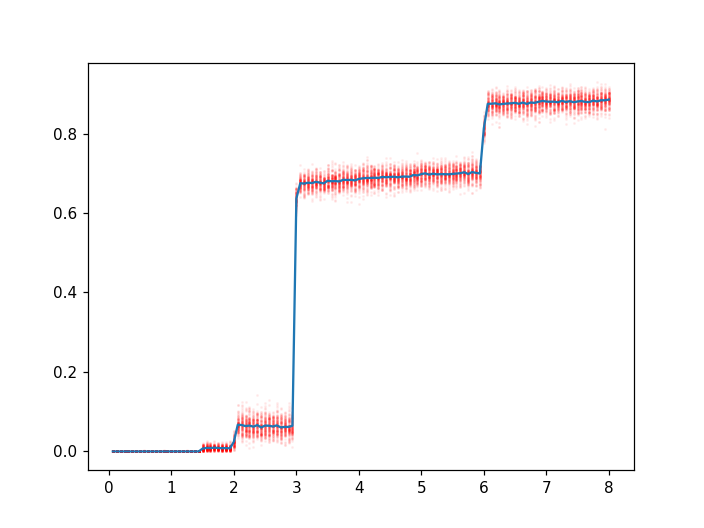

In [39]:
plot_means(partition(0, 8, 128), res23, 1000)

In [40]:
with open('res23.npy', 'wb') as f:
    np.save(f, res23)

In [41]:
with open('res23.npy', 'rb') as f:
    mem = np.load(f)

<IPython.core.display.Javascript object>


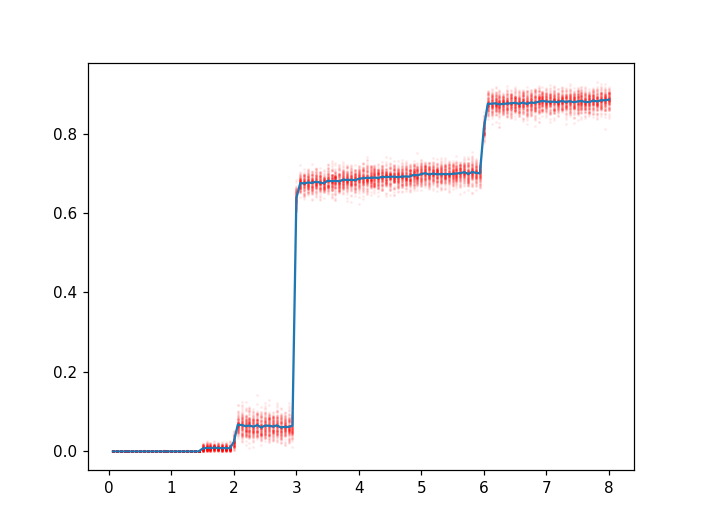

In [45]:
plot_means(partition(0, 8, 128), mem, 1)

In [47]:
graphs357 = Pool(32).map(GraphByDegrees, [{3: 200, 5: 200, 7: 200} for _ in range(100)])

In [54]:
res357 = calc([alpha], partition(0, 16, 128), graphs357, 1000)

passed in 43.52138352394104
passed in 44.093037605285645
passed in 43.95532703399658
passed in 43.527724742889404
passed in 44.36138129234314
passed in 43.24142527580261
passed in 43.519057273864746
passed in 44.15148329734802
passed in 43.215455055236816
passed in 44.06912708282471
passed in 44.741389751434326
passed in 43.6625771522522
passed in 44.10208225250244
passed in 43.96431374549866
passed in 43.283161878585815
passed in 44.19018840789795
passed in 43.37105464935303
passed in 44.17915487289429
passed in 44.274264097213745
passed in 43.024277448654175
passed in 44.203383445739746
passed in 44.09086322784424
passed in 42.8597309589386
passed in 44.098061084747314
passed in 44.09703612327576
passed in 43.78487181663513
passed in 44.212130069732666
passed in 44.2030234336853
passed in 44.57120060920715
passed in 44.70989012718201
passed in 43.474602699279785
passed in 45.68415451049805
passed in 45.256733655929565
passed in 44.04723811149597
passed in 44.956040143966675
passed in

<IPython.core.display.Javascript object>


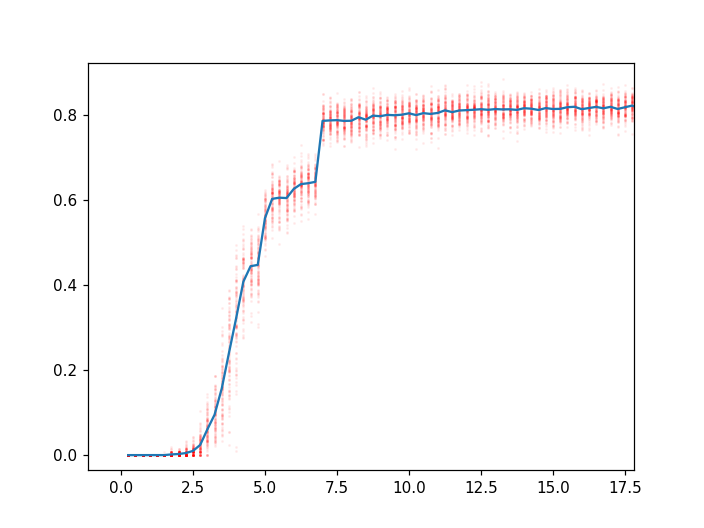

In [53]:
plot_means(partition(0, 32, 128), res357, 10)

<IPython.core.display.Javascript object>


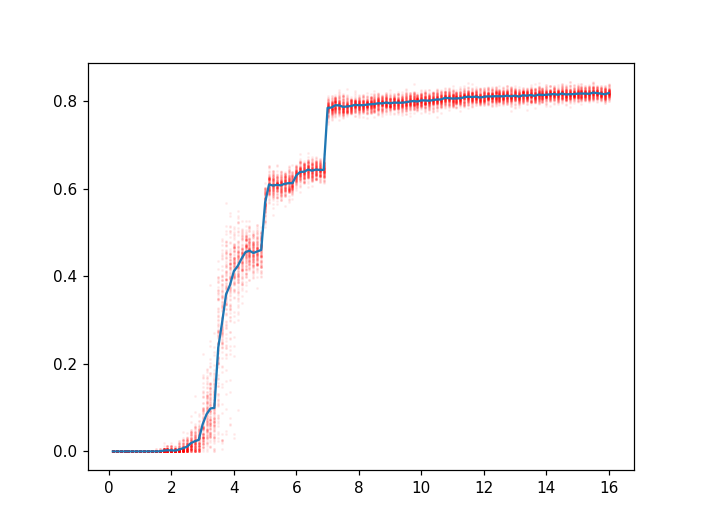

In [56]:
plot_means(partition(0, 16, 128), res357, 100)

In [57]:
res357_5000 = calc([alpha], partition(0, 8, 64), graphs357, 5000)

passed in 106.61115908622742
passed in 107.19605827331543
passed in 106.157381772995
passed in 107.56298828125
passed in 105.80186200141907
passed in 105.55316734313965
passed in 105.1670196056366
passed in 105.18593907356262
passed in 105.2541069984436
passed in 105.99872732162476
passed in 105.54101490974426
passed in 105.94945645332336
passed in 105.68528127670288
passed in 104.90212345123291
passed in 105.15216994285583
passed in 105.11867380142212
passed in 105.38160228729248
passed in 104.78295850753784
passed in 106.15738534927368
passed in 106.34906077384949
passed in 105.65363264083862
passed in 105.7504870891571
passed in 105.67989706993103
passed in 105.89420056343079
passed in 105.67346167564392
passed in 105.35964798927307
passed in 106.00553679466248
passed in 105.08628845214844
passed in 105.98663330078125
passed in 104.48392701148987
passed in 104.59925985336304
passed in 105.06003952026367
passed in 104.50169014930725
passed in 105.19785618782043
passed in 105.18413662

<IPython.core.display.Javascript object>


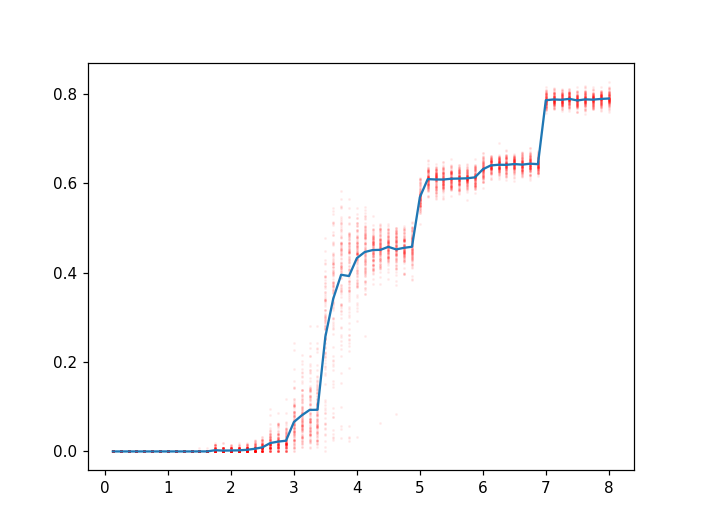

In [59]:
plot_means(partition(0, 8, 64), res357_5000, 100)

In [61]:
with open('res357.npy', 'wb') as f:
    np.save(f, res357_5000)

In [62]:
delete res357_5000

SyntaxError: invalid syntax (<ipython-input-62-0a721935b4b6>, line 1)